## Exploratry Data Analysis for IOT data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('iot_telemetry_data.csv')

In [5]:
df.sample(10)

,ts,device,co,humidity,light,lpg,motion,smoke,temp
214563,1.594878e+09,b8:27:eb:bf:9d:51,0.005439,46.100000,False,0.008183,False,0.021931,22.400000
286156,1.595000e+09,00:0f:00:70:91:0a,0.001591,77.500000,False,0.003363,False,0.008484,19.299999
243973,1.594928e+09,00:0f:00:70:91:0a,0.001956,75.000000,False,0.003906,False,0.009952,19.400000
160296,1.594786e+09,b8:27:eb:bf:9d:51,0.005272,49.000000,False,0.008001,False,0.021410,22.600000
200857,1.594855e+09,b8:27:eb:bf:9d:51,0.005822,47.900000,False,0.008597,False,0.023118,23.000000
125321,1.594727e+09,1c:bf:ce:15:ec:4d,0.004303,59.400002,True,0.006907,False,0.018299,22.900000
238895,1.594919e+09,b8:27:eb:bf:9d:51,0.006209,51.400000,False,0.009006,False,0.024295,22.000000
305538,1.595033e+09,b8:27:eb:bf:9d:51,0.006703,49.000000,False,0.009519,False,0.025775,22.300000
61914,1.594618e+09,b8:27:eb:bf:9d:51,0.005093,50.800000,False,0.007803,False,0.020845,21.800000
203583,1.594860e+09,1c:bf:ce:15:ec:4d,0.003937,55.299999,True,0.006478,False,0.017087,29.200001


## Checking number of entires 

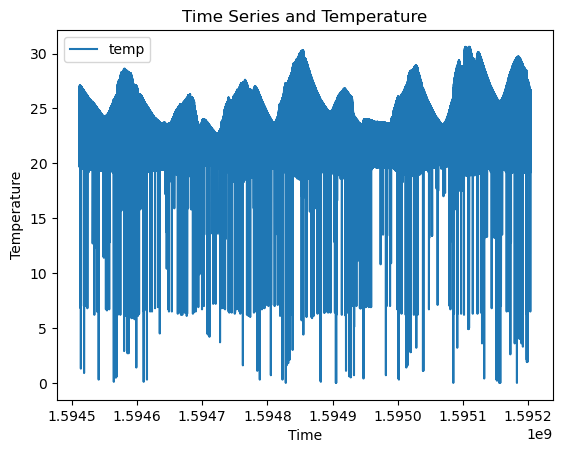

In [4]:
df.plot.line(x='ts', y='temp')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('Time Series and Temperature')
plt.show()



In [4]:
num_rows, num_cols = df.shape
num_rows = df.shape[0]
num_cols = df.shape[1]
print(f'Number of rows: {num_rows}')
print(f'Number of columns: {num_cols}')

Number of rows: 405184
Number of columns: 9


## Printing columns names

In [5]:
column_names = df.columns.tolist()
column_names_string = ', '.join(column_names)
print(column_names_string)

ts, device, co, humidity, light, lpg, motion, smoke, temp


## Checking is there any null entries

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405184 entries, 0 to 405183
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ts        405184 non-null  float64
 1   device    405184 non-null  object 
 2   co        405184 non-null  float64
 3   humidity  405184 non-null  float64
 4   light     405184 non-null  bool   
 5   lpg       405184 non-null  float64
 6   motion    405184 non-null  bool   
 7   smoke     405184 non-null  float64
 8   temp      405184 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 22.4+ MB


In [7]:
null_counts = df.isnull().sum()
print(null_counts)

ts          0
device      0
co          0
humidity    0
light       0
lpg         0
motion      0
smoke       0
temp        0
dtype: int64


In [8]:
df.head(10000).to_csv("test.csv", index=False)

In [9]:
df_test = pd.read_csv("test.csv")

In [10]:
df_test.tail()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
9995,1.594529e+09,00:0f:00:70:91:0a,0.002613,75.699997,False,0.004815,False,0.012445,19.400000
9996,1.594529e+09,b8:27:eb:bf:9d:51,0.004843,52.600000,False,0.007524,False,0.020051,22.000000
9997,1.594529e+09,b8:27:eb:bf:9d:51,0.004855,52.600000,False,0.007538,False,0.020090,22.000000
9998,1.594529e+09,1c:bf:ce:15:ec:4d,0.004053,76.800003,True,0.006615,False,0.017473,25.700001
9999,1.594529e+09,b8:27:eb:bf:9d:51,0.004833,52.600000,False,0.007513,False,0.020020,22.000000


## Shape of test dataframe

In [11]:
df_test.shape

(10000, 9)

In [12]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ts        10000 non-null  float64
 1   device    10000 non-null  object 
 2   co        10000 non-null  float64
 3   humidity  10000 non-null  float64
 4   light     10000 non-null  bool   
 5   lpg       10000 non-null  float64
 6   motion    10000 non-null  bool   
 7   smoke     10000 non-null  float64
 8   temp      10000 non-null  float64
dtypes: bool(2), float64(6), object(1)
memory usage: 566.5+ KB


## Creating table in QuestDB according to data requirment

In [31]:
import requests
import urllib.parse as par


query = """CREATE TABLE IF NOT EXISTS weather (
  ts TIMESTAMP,
  device STRING,
  co FLOAT,
  humidity FLOAT,
  light BOOLEAN,
  lpg FLOAT,
  motion BOOLEAN,
  smoke FLOAT,
  temp FLOAT
)
TIMESTAMP(ts)
PARTITION BY HOUR;"""

response = requests.post("http://localhost:9000/exec?query=" + query)

# Check the response status code and handle the response accordingly
if response.status_code != 200:
    print(f"Error creating table: {response.text}")
else:
    print("Table created successfully")


Table created successfully


In [13]:
import csv
import datetime
import requests

# Open the CSV file
with open("test.csv", "r") as f:
    # Use the csv module to read the CSV file
    reader = csv.reader(f)

    # Get the first row (the header row)
    header = next(reader)

    # Iterate over the rows of the CSV file starting from the second row
    for row in reader:
        # Convert the value in the ts column to a timestamp
        ts = datetime.datetime.fromtimestamp(float(row[0])).strftime("%Y-%m-%d %H:%M:%S")
        
    

import pandas as pd
import csv
import requests
import datetime


# Read the data from the CSV file
with open('iot_telemetry_data.csv', 'r') as f:
    
    reader = csv.reader(f)
    # Skip the first row (column names)
    next(reader)
    # Read the data rows
    rows = [row for row in reader]

# Convert the 'ts' column to a timestamp and the 'temp' column to Celsius
for row in rows:
    
    row[0] = datetime.datetime.fromtimestamp(float(row[0]))
    row[8] = (float(row[8]) - 32) * 5 / 9


batch_size = 350

# Calculate the number of batches
num_batches = len(rows) // batch_size + (len(rows) % batch_size > 0)


# Insert the data into the QuestDB table in batches of rows

for i, batch in enumerate(range(0, len(rows), batch_size)):
    
    batch_number = i+1
     
    batch = rows[i:i+batch_size]
    values = ", ".join([f"('{row[0]}', '{row[1]}', {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]}, {row[7]}, {row[8]})" for row in batch])
    query = f"INSERT INTO weather (ts, device, co, humidity, light, lpg, motion, smoke, temp) VALUES {values}"
    response = requests.post("http://localhost:9000/exec?query=" + query)
    
    # Check the response status code and handle the response accordingly
    if response.status_code != 200:
        print(f"Batch {batch_number} of {num_batches} Error Inserting Data: {response.text}")
            
    else:
        print(f"Batch {batch_number} of {num_batches} Inserted Successfully")
    

## Function for creating table

In [17]:
import pandas as pd
import csv
import requests
import datetime

table_name = 'test'
def create_table():
    # Use the table_name variable in the CREATE TABLE query
    query = f"""CREATE TABLE IF NOT EXISTS {table_name} 
          (
          ts TIMESTAMP,
          device STRING,
          co FLOAT,
          humidity FLOAT,
          light BOOLEAN,
          lpg FLOAT,
          motion BOOLEAN,
          smoke FLOAT,
          temp FLOAT
          )
          TIMESTAMP(ts)
          PARTITION BY HOUR;"""
    
    response = requests.post("http://localhost:9000/exec?query=" + query)
    
    if response.status_code != 200:
        print(f"Error creating table: {response.text}")
            
    else:
        print("Table created successfully")


## Function for transformation and inserting data in batches into QuestDB

In [21]:
import csv
import requests
import datetime

csv_file = 'test.csv'


def data_in_batches():
    # Read the data from the CSV file
    with open(csv_file, 'r') as f:

        reader = csv.reader(f)
        # Skip the first row (column names)
        next(reader)
        # Read the data rows
        rows = [row for row in reader]

    # Convert the 'ts' column to a timestamp and the 'temp' column to Celsius
    for row in rows:

        row[0] = datetime.datetime.fromtimestamp(float(row[0]))
        row[8] = (float(row[8]) - 32) * 5 / 9


    batch_size = 350

    # Calculate the number of batches
    num_batches = len(rows) // batch_size + (len(rows) % batch_size > 0)


    # Insert the data into the QuestDB table in batches of rows

    for i, batch in enumerate(range(0, len(rows), batch_size)):

        batch_number = i+1

        batch = rows[i:i+batch_size]
        
        values = ", ".join([f"('{row[0]}', '{row[1]}', {row[2]}, {row[3]}, {row[4]}, {row[5]}, {row[6]}, {row[7]}, {row[8]})" for row in batch])
        
        query = f"INSERT INTO {table_name} (ts, device, co, humidity, light, lpg, motion, smoke, temp) VALUES {values}"
        
        response = requests.post("http://localhost:9000/exec?query=" + query)

        # Check the response status code and handle the response accordingly
        if response.status_code != 200:
            print(f"Batch {batch_number} of {num_batches} Error Inserting Data: {response.text}")

        else:
            print(f"Batch {batch_number} of {num_batches} Inserted Successfully")
